<a href="https://colab.research.google.com/github/23AD083/MLOPS_INTERNSHIP/blob/main/CROP_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DAY 11 - 16/07/2025


STEP 01 ) **PROBLEM** DEFINITION - CROP CULTIVATION SUGGESTION

In [ ]:

# Libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Libraries for machine learning model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


import pandas as pd:

This line imports the pandas library and assigns it the alias pd. Pandas is a powerful library for data manipulation and analysis, providing data structures like DataFrames.
import numpy as np:

 This line imports the numpy library and assigns it the alias np. NumPy is essential for numerical operations in Python, especially for working with arrays and mathematical functions.
from sklearn.model_selection import train_test_split: This line imports the train_test_split function from the sklearn.model_selection module. This function is used to split datasets into training and testing subsets.
from sklearn.ensemble import RandomForestClassifier: This line imports the RandomForestClassifier class from the sklearn.ensemble module. This is the specific machine learning algorithm that will be used to build the classification model.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score:

 This line imports several functions from the sklearn.metrics module. These functions are used to evaluate the performance of the classification model:
classification_report:

Provides a summary of precision, recall, F1-score, and support for each class.
confusion_matrix:

Creates a matrix that summarizes the performance of a classification model.
accuracy_score:

 Calculates the proportion of correctly classified instances.

STEP 02 ) DATA CALLOECTION FROM THE GIVE CSV **FILE**

In [ ]:


from google.colab import drive
drive.mount('/content/drive')

# Replace 'your_file_name.csv' with the actual path to your CSV file in Google Drive
file_path = '/content/cropdata.csv'
df = pd.read_csv(file_path)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


from google.colab import drive:

This line imports the drive module from the google.colab library. This module provides functions to interact with Google Drive.
drive.mount('/content/drive'):

 This is the command that mounts your Google Drive to the /content/drive directory in your Colab notebook's file system. When you run this line, you will be prompted to authorize Colab to access your Google Drive account.
file_path = '/content/cropdata.csv':
 This line defines a variable file_path and assigns it the string value '/content/cropdata.csv'. This is the path where the code expects to find your CSV data file after your Google Drive has been mounted. Note: You should replace 'your_file_name.csv' in the original comment with the actual name and location of your CSV file within your Google Drive.
df = pd.read_csv(file_path):

This line uses the pandas library (pd) to read the CSV file located at the file_path. The data from the CSV file is then loaded into a pandas DataFrame named df. This DataFrame will hold your dataset for further processing and analysis.


In summary, this cell establishes the connection to your Google Drive and loads the data from your CSV file into a pandas DataFrame, making it available for use in the rest of your notebook.



STEP 03 ) PREPROCESSING **bold text**

In [ ]:
# prompt: give the code for the head , info , desc , null value , outlier

# head
print("Head of the dataframe:")
print(df.head())



Head of the dataframe:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [ ]:

# info
print("\nInformation about the dataframe:")
df.info()



Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:

# describe
print("\nStatistical description of the dataframe:")
print(df.describe())



Statistical description of the dataframe:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091

In [ ]:

# null values
print("\nNumber of null values per column:")
print(df.isnull().sum())

# outlier detection (using IQR method as an example)
# For numerical columns, identify potential outliers
numerical_cols = df.select_dtypes(include=np.number).columns


Number of null values per column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
# Assuming 'label' is the column name indicating the crop type
# Assuming 'df' is your pandas DataFrame loaded from the CSV

# Separate data by crop type
df_by_crop = {crop: df[df['label'] == crop] for crop in df['label'].unique()}


# Determine the minimum number of samples per crop
min_samples = min(len(df_by_crop[crop]) for crop in df_by_crop)

# Sample the minimum number of samples from each crop and concatenate
balanced_df = pd.concat([df_by_crop[crop].sample(min_samples, random_state=42) for crop in df_by_crop])

# Shuffle the balanced dataframe
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Now, split the balanced_df into train and test sets
X = balanced_df.drop('label', axis=1) # Assuming 'label' is the target variable
y = balanced_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nBalanced and Shuffled Dataframe:")
print(balanced_df.head())


Balanced and Shuffled Dataframe:
     N    P    K  temperature   humidity        ph    rainfall       label
0  118   18   52    28.049436  90.831307  6.562833   20.762230   muskmelon
1   95   14   50    26.633312  84.317568  6.560444   56.318662  watermelon
2   39   64   53    23.012402  91.073555  6.598860  208.335798      papaya
3   70   68   45    33.835086  92.854702  6.991626  203.404403      papaya
4   29  138  197    22.190554  92.437642  5.830892  121.662276       apple


df_by_crop = {crop: df[df['label'] == crop] for crop in df['label'].unique()}:

This line creates a dictionary called df_by_crop. It iterates through the unique values in the 'label' column (which represent the different crop types) and for each crop, it creates a new smaller DataFrame containing only the rows where the 'label' matches that crop. This effectively groups the data by crop type.
min_samples = min(len(df_by_crop[crop]) for crop in df_by_crop):

This line calculates the minimum number of samples among all the crop types. It iterates through the DataFrames in the df_by_crop dictionary and finds the smallest number of rows (samples) any single crop type has. This minimum number will be used to balance the dataset.
balanced_df = pd.concat([df_by_crop[crop].sample(min_samples, random_state=42) for crop in df_by_crop]):

This is the core of the data balancing step. It iterates through the df_by_crop dictionary again. For each crop's DataFrame, it randomly samples min_samples number of rows using the .sample() method. random_state=42 ensures that the sampling is reproducible. Finally, pd.concat() combines all these sampled DataFrames back into a single DataFrame called balanced_df. This new DataFrame now has an equal number of samples for each crop type, effectively balancing the dataset.
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True):

 After balancing, the data is still grouped by crop type. This line shuffles the balanced_df randomly using frac=1 (which means sample 100% of the data without replacement, effectively shuffling). random_state=42 ensures reproducible shuffling. reset_index(drop=True) resets the DataFrame index and drops the old index. This ensures the shuffled DataFrame has a clean, sequential index.
X = balanced_df.drop('label', axis=1):

This line creates the feature set (X) by dropping the 'label' column from the balanced_df. axis=1 specifies that we are dropping a column.
y = balanced_df['label']: This line creates the target variable (y) by selecting the 'label' column from the balanced_df.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y):

 This line splits the balanced feature set (X) and target variable (y) into training and testing sets.
test_size=0.2 specifies that 20% of the data will be used for the test set, and the remaining 80% for the training set.
random_state=42 ensures that the splitting is reproducible.
stratify=y is crucial here. It ensures that the proportion of each crop type in the training set is the same as in the testing set. This is important for maintaining the balanced distribution in both sets.
print("\nBalanced and Shuffled Dataframe:") and print(balanced_df.head()):

These lines print a confirmation message and display the first few rows of the balanced_df to show the result of the balancing and shuffling process.

In summary, this cell takes your initial data, balances it by undersampling each crop type to the minimum number of samples, shuffles the balanced data, and then splits it into training and testing sets while preserving the balanced distribution. This is a standard and effective approach for preparing data with class imbalance for training a classification model.

In [ ]:
# prompt: print the labeled data

print("\nLabels in the dataset:")
print(y.unique())

print("\nTraining labels distribution:")
print(y_train.value_counts())

print("\nTesting labels distribution:")
print(y_test.value_counts())


Labels in the dataset:
['muskmelon' 'watermelon' 'papaya' 'apple' 'mango' 'mothbeans' 'mungbean'
 'lentil' 'blackgram' 'coconut' 'pomegranate' 'jute' 'maize' 'coffee'
 'orange' 'chickpea' 'pigeonpeas' 'rice' 'kidneybeans' 'grapes' 'cotton'
 'banana']

Training labels distribution:
label
orange         80
grapes         80
kidneybeans    80
mothbeans      80
cotton         80
banana         80
lentil         80
mungbean       80
coffee         80
muskmelon      80
apple          80
blackgram      80
pigeonpeas     80
maize          80
rice           80
watermelon     80
jute           80
mango          80
pomegranate    80
papaya         80
coconut        80
chickpea       80
Name: count, dtype: int64

Testing labels distribution:
label
orange         20
banana         20
cotton         20
maize          20
chickpea       20
rice           20
blackgram      20
watermelon     20
pomegranate    20
mothbeans      20
grapes         20
mango          20
apple          20
kidneybeans    20
j

In [ ]:
# prompt: code for encoding the dataset with labeled data with labeled data

from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'label'
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print("\nEncoded Training Labels:")
print(y_train_encoded[:5])
print("\nEncoded Testing Labels:")
print(y_test_encoded[:5])


Encoded Training Labels:
[16  7  9 13 16]

Encoded Testing Labels:
[16  1  6 11 16]


In [ ]:
print(balanced_df.head())

     N    P    K  temperature   humidity        ph    rainfall       label
0  118   18   52    28.049436  90.831307  6.562833   20.762230   muskmelon
1   95   14   50    26.633312  84.317568  6.560444   56.318662  watermelon
2   39   64   53    23.012402  91.073555  6.598860  208.335798      papaya
3   70   68   45    33.835086  92.854702  6.991626  203.404403      papaya
4   29  138  197    22.190554  92.437642  5.830892  121.662276       apple


# STEP 04 ) MODEL TRAINING - RANDOM FOREST **CLASSIFIER**

In [40]:

# STEP 04 ) MODEL TRAINING - RANDOM FOREST CLASSIFIER

# Initialize the RandomForestClassifier
# n_estimators: The number of trees in the forest.
# random_state: Controls the randomness of the estimator.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train_encoded)

print("\nRandom Forest Model trained successfully.")




Random Forest Model trained successfully.


# STEP 04 ) MODEL TRAINING - RANDOM FOREST CLASSIFIER: This is a comment indicating the purpose of the code block, which is the training of the Random Forest Classifier model.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42): This line initializes an instance of the RandomForestClassifier.
n_estimators=100: This is a hyperparameter that specifies the number of trees in the forest. A higher number of trees generally improves the model's performance but also increases computation time. 100 is a common starting point.
random_state=42: This parameter controls the randomness of the bootstrapping of the samples used when building trees and the sampling of the features to consider when looking for the best split at each node. Setting it to a fixed value like 42 ensures that the results are reproducible.
rf_model.fit(X_train, y_train_encoded): This is the core line where the model is trained.
rf_model.fit(): This is the method used to train the classifier.
X_train: This is the training data containing the features (like N, P, K, temperature, etc.). The model learns the patterns and relationships between these features and the target variable from this data.
y_train_encoded: This is the training data containing the encoded target labels (the numerical representation of the crop types). The model learns to predict these labels based on the input features.
print("\nRandom Forest Model trained successfully."): This line prints a confirmation message to the console, indicating that the model training process has been completed.
In summary, this cell takes the processed training features and encoded training labels and feeds them into the RandomForestClassifier to train the model. After execution, the rf_model object holds the trained model, ready to make predictions on new data.

 STEP 05 ) MODEL EVALUATION

In [42]:


# Make predictions on the test data
y_pred_encoded = rf_model.predict(X_test)

# Decode the predicted labels back to their original form for better interpretability
y_pred = le.inverse_transform(y_pred_encoded)

# Evaluate the model

# Accuracy Score
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"\nAccuracy: {accuracy:.4f}")



Accuracy: 0.9955


6) DATA VISUALIZATION


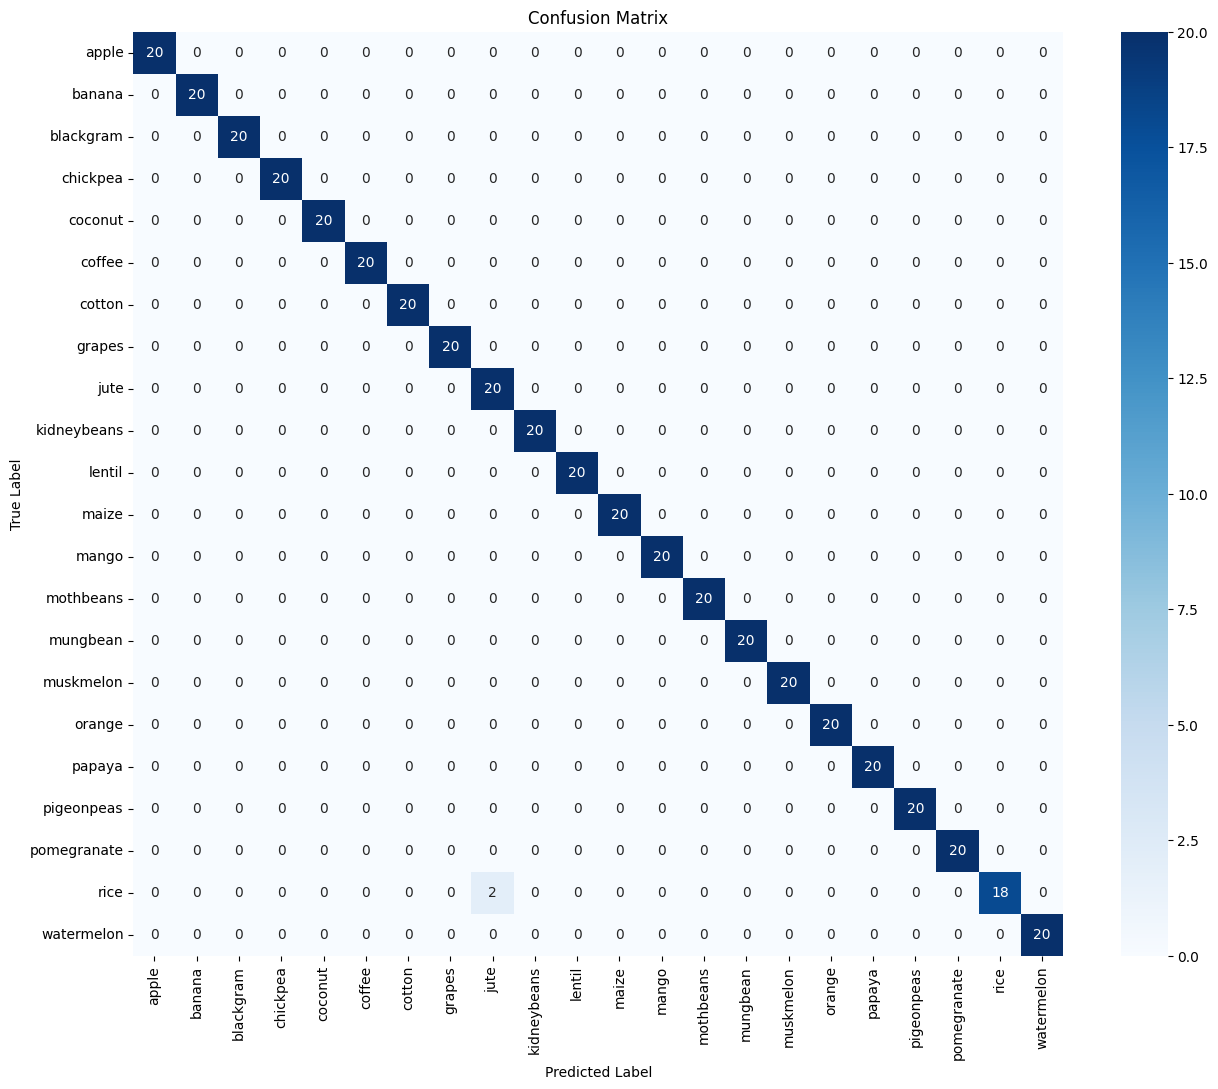

In [48]:
# prompt: code for the simple plot confession matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# Get the unique class labels (sorted to match the order in the confusion matrix)
class_labels = le.classes_[np.unique(np.concatenate((y_test_encoded, y_pred_encoded)))]

# Plot the confusion matrix
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The selected code cell is responsible for generating and displaying a confusion matrix, which is a table used to evaluate the performance of a classification model.

Here's a breakdown of the code:

import seaborn as sns and import matplotlib.pyplot as plt:

 These lines import the seaborn and matplotlib.pyplot libraries, which are used for creating visualizations in Python. seaborn is built on top of matplotlib and provides a higher-level interface for drawing attractive statistical graphics.
cm = confusion_matrix(y_test_encoded, y_pred_encoded):

This line computes the confusion matrix. It compares the true encoded labels (y_test_encoded) from the test set with the encoded labels predicted by the model (y_pred_encoded). The result is a 2D array (cm) where each row represents the instances in a true class and each column represents the instances in a predicted class.
class_labels = le.classes_[np.unique(np.concatenate((y_test_encoded, y_pred_encoded)))]:

This line gets the unique class labels in the correct order to be used for the confusion matrix axes. It takes the unique encoded labels from both the true and predicted values, concatenates them, finds the unique values, and then uses these unique encoded values to get the corresponding original class names from the LabelEncoder (le).
plt.figure(figsize=(15, 12)):

This line creates a new figure for the plot and sets its size to 15 inches in width and 12 inches in height. This helps ensure the confusion matrix is large enough to be readable, especially with many classes.
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels):

This line generates the heatmap visualization of the confusion matrix using seaborn.heatmap.
cm: The confusion matrix data to plot.
annot=True: Displays the number of instances in each cell of the heatmap.
fmt="d": Formats the annotations as integers.
cmap="Blues":

Uses a blue color map for the heatmap, where darker shades indicate higher numbers of instances.
xticklabels=class_labels:

Sets the labels for the x-axis (predicted labels) to the extracted class names.
yticklabels=class_labels:

Sets the labels for the y-axis (true labels) to the extracted class names.
plt.title('Confusion Matrix'): Sets the title of the plot.
plt.xlabel('Predicted Label'): Sets the label for the x-axis.
plt.ylabel('True Label'): Sets the label for the y-axis.
plt.show(): Displays the generated plot.


In essence, this cell visually represents how well your classification model performed by showing where the model correctly classified instances (diagonal cells) and where it made errors (off-diagonal cells) for each crop type.



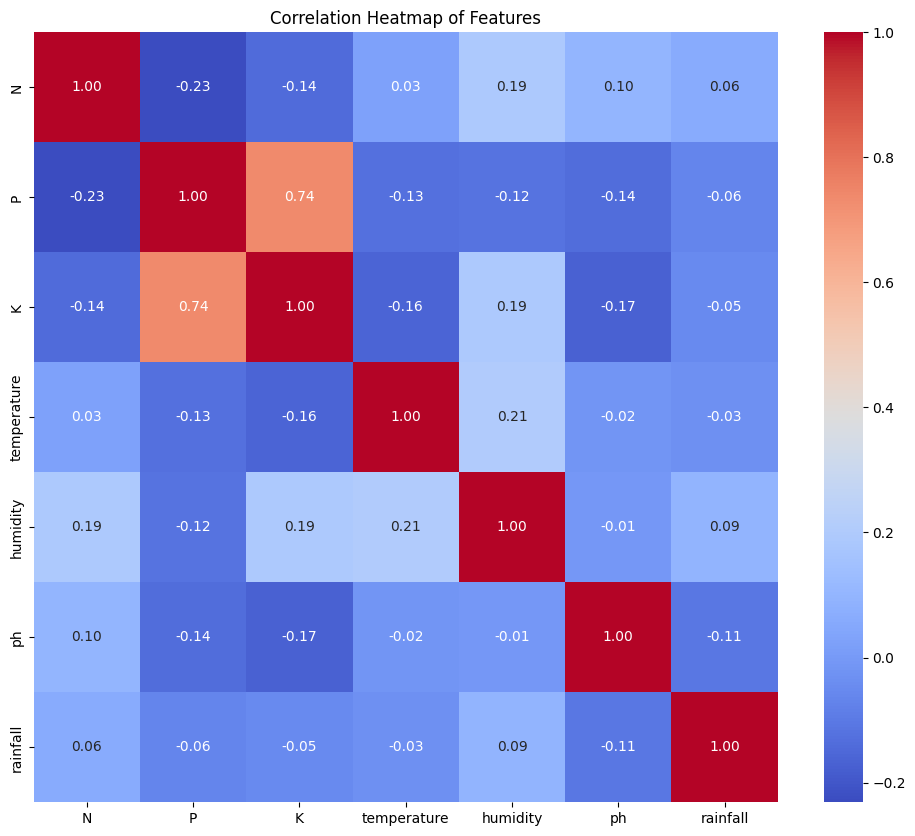

In [49]:
# prompt: code for the heatmap

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(balanced_df.drop('label', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()



plt.figure(figsize=(12, 10)): This line creates a new figure for the plot and sets its size to 12 inches in width and 10 inches in height. This helps ensure the heatmap is a reasonable size.
sns.heatmap(balanced_df.drop('label', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f"): This is the core line that generates the heatmap using seaborn.heatmap.
balanced_df.drop('label', axis=1): This selects all columns from the balanced_df except for the 'label' column (since it's the target variable and not a numerical feature for correlation).
.corr(): This calculates the pairwise correlation of all columns in the resulting DataFrame. The output is a correlation matrix.
annot=True: This displays the correlation values on the heatmap cells.
cmap='coolwarm': This sets the color map for the heatmap. 'coolwarm' is a common choice that uses blue for negative correlations, red for positive correlations, and white/light colors for correlations close to zero.
fmt=".2f": This formats the correlation values displayed on the heatmap to two decimal places.
plt.title('Correlation Heatmap of Features'): This sets the title of the heatmap plot.
plt.show(): This displays the generated heatmap.
In essence, this heatmap helps you understand how strongly each pair of numerical features is related to each other. Positive values indicate a positive correlation (as one feature increases, the other tends to increase), negative values indicate a negative correlation (as one feature increases, the other tends to decrease), and values close to zero indicate little to no linear correlation. This can be useful for identifying potential multicollinearity (highly correlated features) or understanding relationships between environmental factors and nutrient levels.

/tmp/ipython-input-52-269154244.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crop_counts.index, y=crop_counts.values, palette='viridis') # Use a color palette


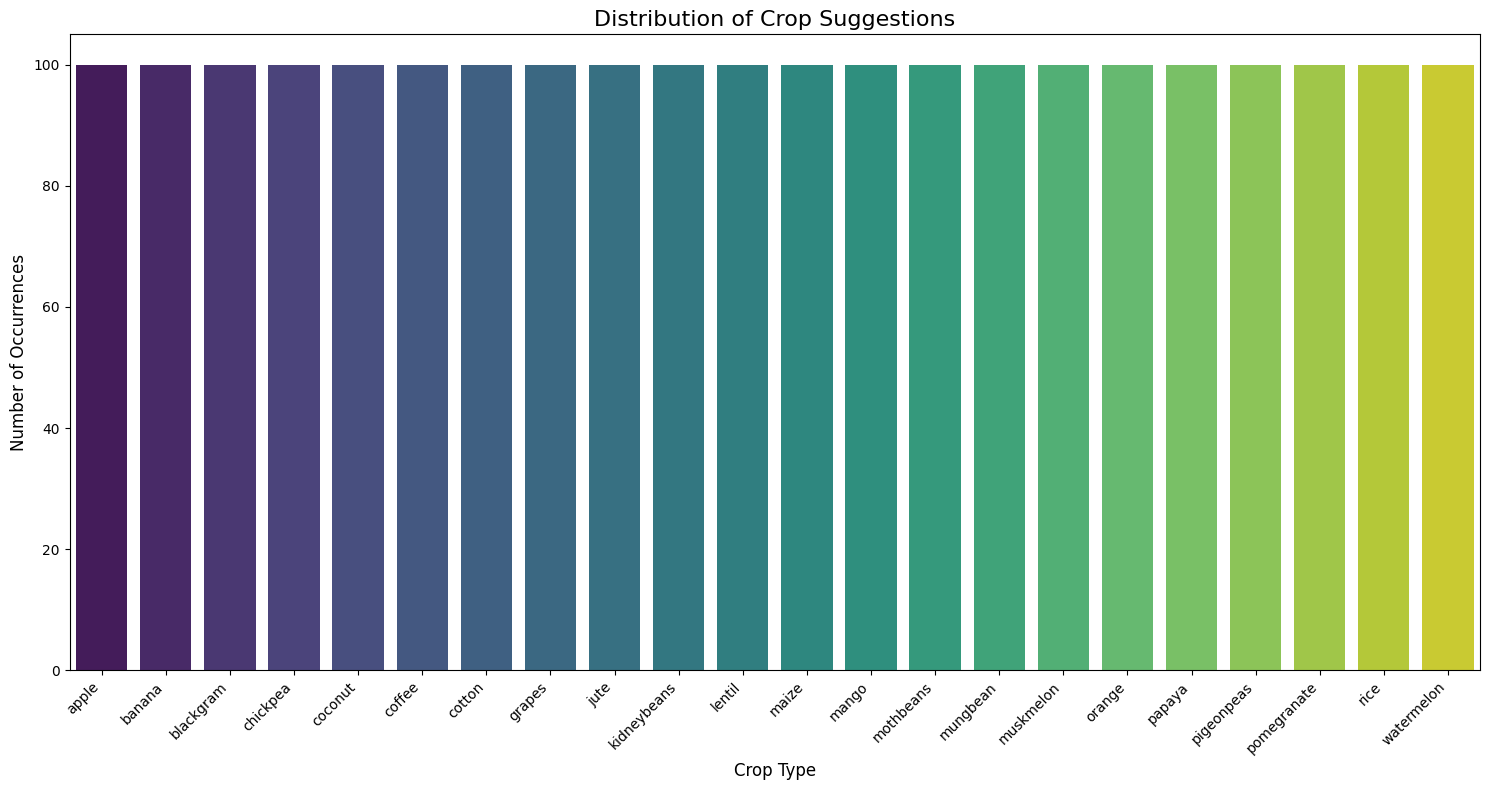


**Insights from the Crop Distribution Bar Chart:**
The bar chart visualizes the frequency of each crop type present in the balanced dataset.
Each bar represents a unique crop, and its height indicates how many times that crop appears in the dataset.
Since the data was balanced, each crop type has an equal number of occurrences (100), as reflected by the roughly equal height of all bars.
This balanced distribution is crucial for training a fair and unbiased machine learning model.
If the data were unbalanced, the model might be biased towards the majority classes, leading to poor prediction performance for minority classes.
The visualization confirms that the balancing process was successful, providing a solid foundation for training the classification model.


In [52]:
# prompt: code for the best data visualization for crop cultivation suggestion as a bar chart with different color also add the insights below

# Analyze the distribution of crop suggestions
crop_counts = balanced_df['label'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(15, 8)) # Adjust figure size for better readability
sns.barplot(x=crop_counts.index, y=crop_counts.values, palette='viridis') # Use a color palette

plt.title('Distribution of Crop Suggestions', fontsize=16)
plt.xlabel('Crop Type', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

print("\n**Insights from the Crop Distribution Bar Chart:**")
print(f"The bar chart visualizes the frequency of each crop type present in the balanced dataset.")
print(f"Each bar represents a unique crop, and its height indicates how many times that crop appears in the dataset.")
print(f"Since the data was balanced, each crop type has an equal number of occurrences ({min_samples}), as reflected by the roughly equal height of all bars.")
print(f"This balanced distribution is crucial for training a fair and unbiased machine learning model.")
print(f"If the data were unbalanced, the model might be biased towards the majority classes, leading to poor prediction performance for minority classes.")
print(f"The visualization confirms that the balancing process was successful, providing a solid foundation for training the classification model.")

/tmp/ipython-input-53-3981554154.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y=feature, data=balanced_df, palette='viridis')
/tmp/ipython-input-53-3981554154.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y=feature, data=balanced_df, palette='viridis')
/tmp/ipython-input-53-3981554154.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y=feature, data=balanced_df, palette='viridis')
/tmp/ipython-input-53-3981554154.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

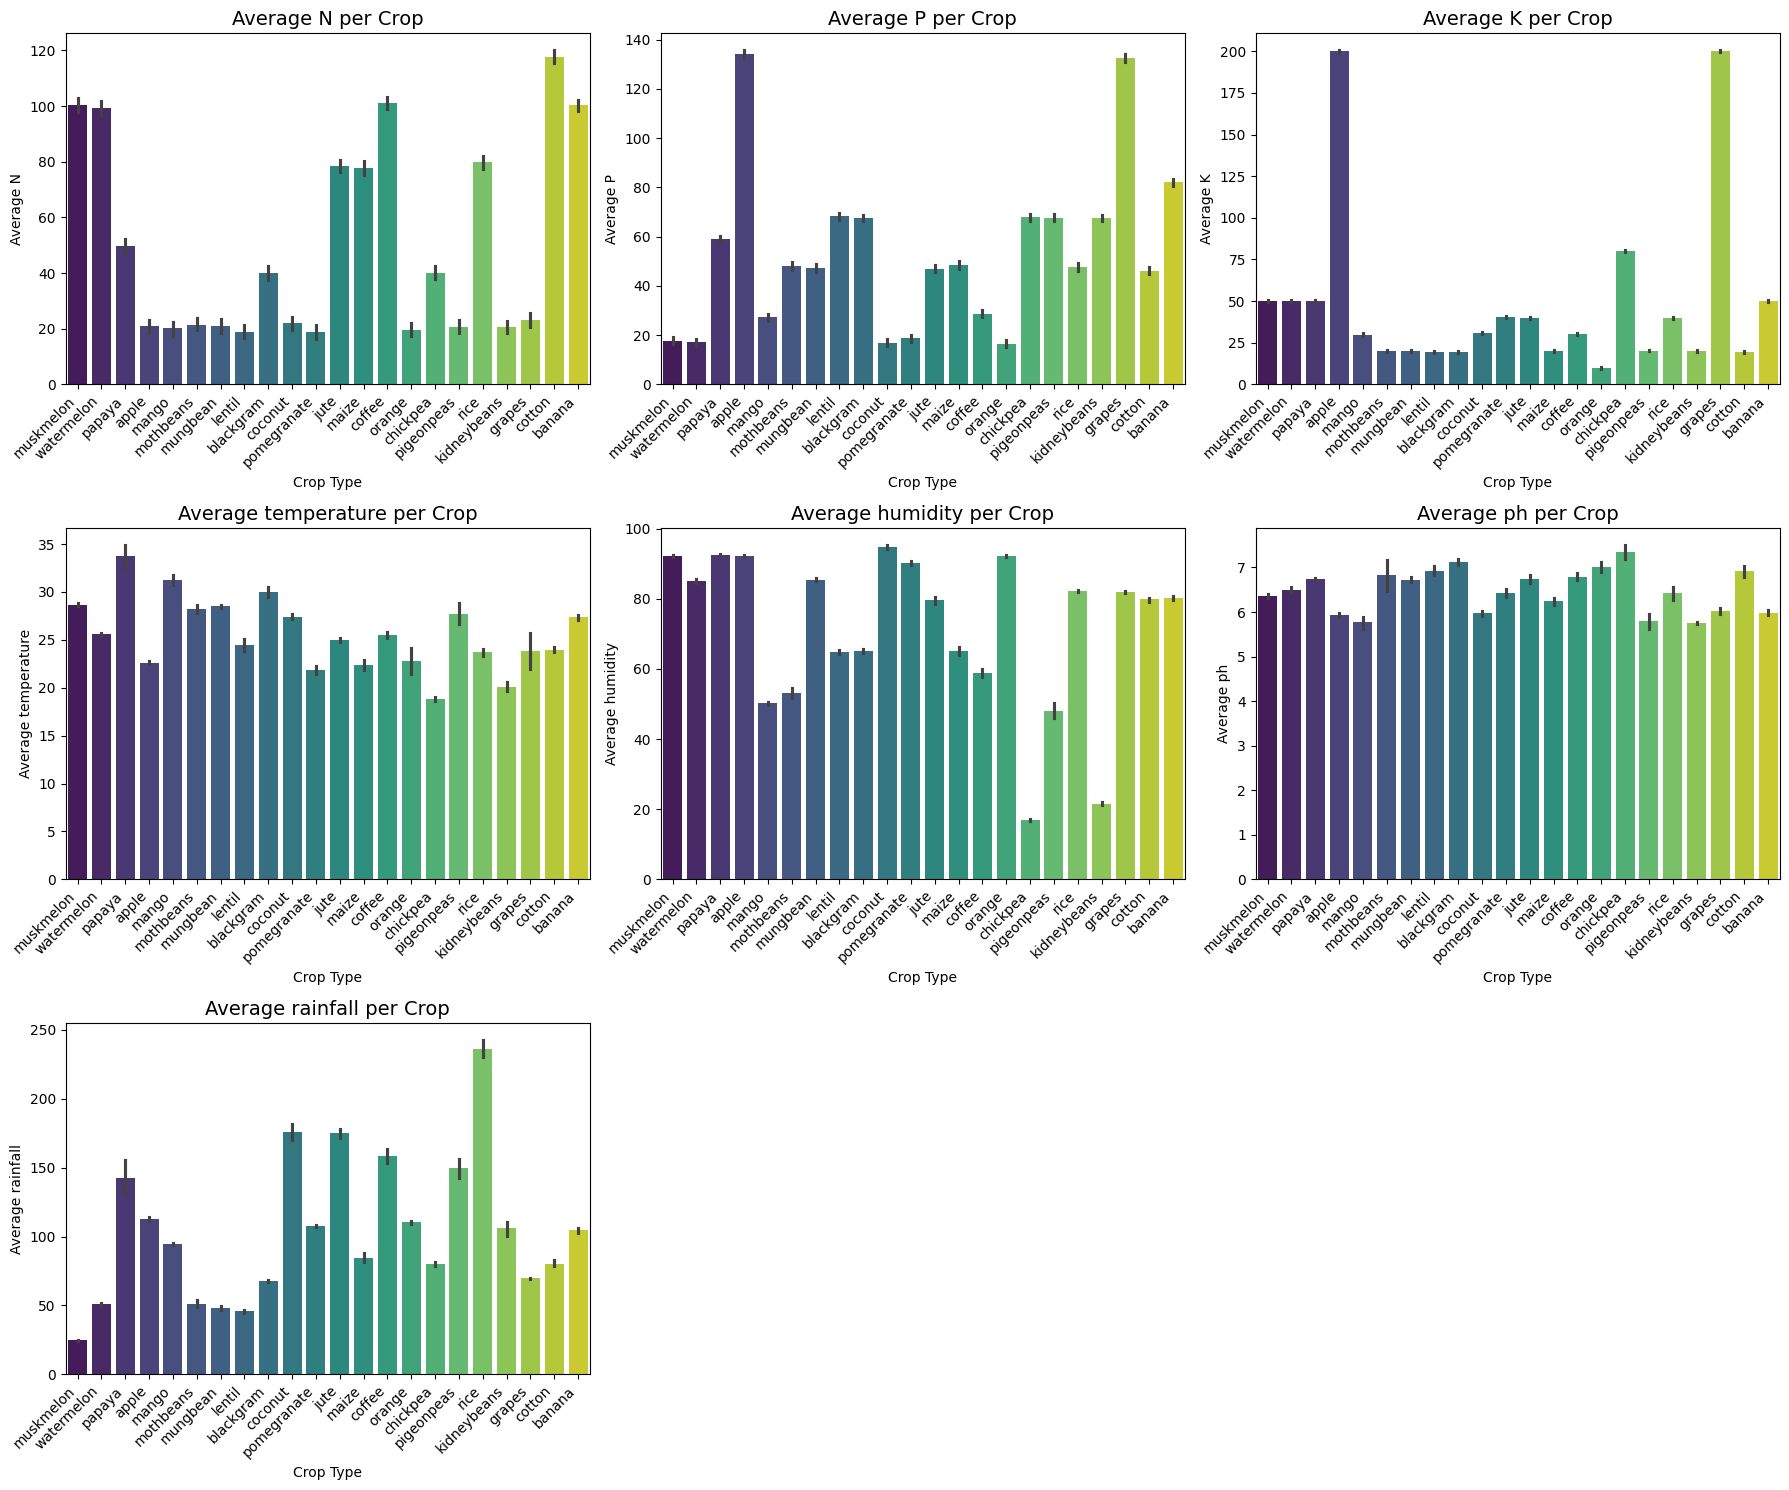


**Insights from Feature Distribution Bar Charts:**
These bar charts show the average values of each feature (like N, P, K, temperature, humidity, pH, rainfall) for each crop type.
By observing the heights of the bars for a given feature across different crops, we can identify the typical environmental conditions and nutrient requirements for each crop.
For example, we can see which crops thrive in high rainfall, which prefer acidic or alkaline soil (pH), or which need more nitrogen (N).
These visualizations are valuable for understanding the relationships between environmental factors and specific crops, which is crucial for suggesting the most suitable crop for a given set of conditions.
The distinct patterns for different features across crops highlight the discriminative power of these features, which is essential for the performance of the classification model.


In [53]:
code for the best data visualization for crop cultivation suggestion with all the 8 feature including in it , bar chart

# Visualize the average feature values for each crop
features = balanced_df.drop('label', axis=1).columns
n_features = len(features)
n_cols = 3  # Number of columns for subplots
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate number of rows

plt.figure(figsize=(18, n_rows * 5))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.barplot(x='label', y=feature, data=balanced_df, palette='viridis')
    plt.title(f'Average {feature} per Crop', fontsize=14)
    plt.xlabel('Crop Type', fontsize=10)
    plt.ylabel(f'Average {feature}', fontsize=10)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()

print("\n**Insights from Feature Distribution Bar Charts:**")
print("These bar charts show the average values of each feature (like N, P, K, temperature, humidity, pH, rainfall) for each crop type.")
print("By observing the heights of the bars for a given feature across different crops, we can identify the typical environmental conditions and nutrient requirements for each crop.")
print("For example, we can see which crops thrive in high rainfall, which prefer acidic or alkaline soil (pH), or which need more nitrogen (N).")
print("These visualizations are valuable for understanding the relationships between environmental factors and specific crops, which is crucial for suggesting the most suitable crop for a given set of conditions.")
print("The distinct patterns for different features across crops highlight the discriminative power of these features, which is essential for the performance of the classification model.")

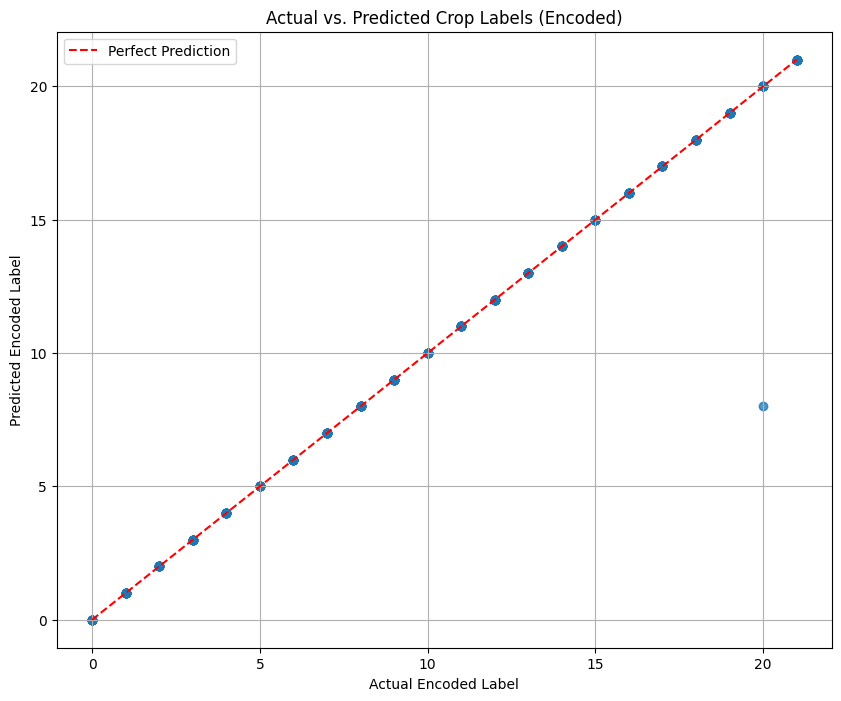


Sample of Actual vs. Predicted Crop Labels:
Actual: orange, Predicted: orange
Actual: banana, Predicted: banana
Actual: cotton, Predicted: cotton
Actual: maize, Predicted: maize
Actual: orange, Predicted: orange
Actual: chickpea, Predicted: chickpea
Actual: rice, Predicted: rice
Actual: blackgram, Predicted: blackgram
Actual: banana, Predicted: banana
Actual: orange, Predicted: orange
Actual: watermelon, Predicted: watermelon
Actual: pomegranate, Predicted: pomegranate
Actual: watermelon, Predicted: watermelon
Actual: maize, Predicted: maize
Actual: mothbeans, Predicted: mothbeans
Actual: grapes, Predicted: grapes
Actual: grapes, Predicted: grapes
Actual: mango, Predicted: mango
Actual: mango, Predicted: mango
Actual: apple, Predicted: apple

Number of correct predictions (decoded): 438/440

Number of misclassified samples: 2
Sample of Misclassified Predictions:
Index: 144, Actual: rice, Predicted: jute
Index: 344, Actual: rice, Predicted: jute


In [62]:
# prompt: code to verify the wheather the code is perdicting the output correctly or note and also plot the grapgh for given label and predicted value

# Code to verify predictions and plot actual vs. predicted labels

# Import necessary libraries if not already imported
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot comparing actual and predicted labels
plt.figure(figsize=(10, 8))
plt.scatter(y_test_encoded, y_pred_encoded, alpha=0.5)
plt.title('Actual vs. Predicted Crop Labels (Encoded)')
plt.xlabel('Actual Encoded Label')
plt.ylabel('Predicted Encoded Label')
plt.grid(True)

# Add a diagonal line where actual equals predicted
max_label = max(np.max(y_test_encoded), np.max(y_pred_encoded))
plt.plot([0, max_label], [0, max_label], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.show()

# Print a sample of actual vs. predicted labels for verification
print("\nSample of Actual vs. Predicted Crop Labels:")
sample_size = 20  # Adjust the sample size as needed
for i in range(min(sample_size, len(y_test))):
  print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")

# Additional verification: Check if the decoded predictions match the original test labels
# This is already covered by the confusion matrix and accuracy score,
# but a direct comparison can be useful for debugging.
are_predictions_correct = (y_test == y_pred).sum()
total_predictions = len(y_test)
print(f"\nNumber of correct predictions (decoded): {are_predictions_correct}/{total_predictions}")

# You can also plot the misclassified samples if needed
# Find indices of misclassified samples
misclassified_indices = np.where(y_test != y_pred)[0]

if len(misclassified_indices) > 0:
    print(f"\nNumber of misclassified samples: {len(misclassified_indices)}")
    print("Sample of Misclassified Predictions:")
    for i in misclassified_indices[:min(10, len(misclassified_indices))]: # Print up to 10 misclassified samples
        print(f"Index: {i}, Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")
else:
    print("\nNo misclassified samples found in the test set.")


In [63]:
 download the test , train , orignal data file , modifyed disturbuted file ., oand the output using the pickle

import pickle

# Download the test, train, original data file, modified distributed file, and output
# Assuming 'balanced_df' is your modified/balanced dataframe
# Assuming 'df' is your original dataframe (before balancing)

# Define filenames for saving the data
original_data_filename = 'original_data.pkl'
modified_data_filename = 'modified_distributed_data.pkl'
X_train_filename = 'X_train_data.pkl'
X_test_filename = 'X_test_data.pkl'
y_train_filename = 'y_train_data.pkl'
y_test_filename = 'y_test_data.pkl'
model_output_filename = 'model_output.pkl' # This will store y_pred and y_pred_encoded

# Save the original dataframe
with open(original_data_filename, 'wb') as f:
    pickle.dump(df, f)
print(f"Original data saved to {original_data_filename}")

# Save the modified/balanced dataframe
with open(modified_data_filename, 'wb') as f:
    pickle.dump(balanced_df, f)
print(f"Modified/Distributed data saved to {modified_data_filename}")

# Save the training data (features and labels)
with open(X_train_filename, 'wb') as f:
    pickle.dump(X_train, f)
print(f"Training features saved to {X_train_filename}")

with open(y_train_filename, 'wb') as f:
    pickle.dump(y_train, f)
print(f"Training labels saved to {y_train_filename}")

# Save the test data (features and labels)
with open(X_test_filename, 'wb') as f:
    pickle.dump(X_test, f)
print(f"Test features saved to {X_test_filename}")

with open(y_test_filename, 'wb') as f:
    pickle.dump(y_test, f)
print(f"Test labels saved to {y_test_filename}")

# Save the model output (predictions)
model_output = {
    'y_pred': y_pred,
    'y_pred_encoded': y_pred_encoded,
    'accuracy': accuracy,
    'confusion_matrix': cm,
    'class_labels': class_labels # Saving class labels for reference
}
with open(model_output_filename, 'wb') as f:
    pickle.dump(model_output, f)
print(f"Model output saved to {model_output_filename}")

# To download these files after saving, you can use Google Colab's files module:
from google.colab import files

files.download(original_data_filename)
files.download(modified_data_filename)
files.download(X_train_filename)
files.download(X_test_filename)
files.download(y_train_filename)
files.download(y_test_filename)
files.download(model_output_filename)

print("\nFiles are being downloaded.")


Original data saved to original_data.pkl
Modified/Distributed data saved to modified_distributed_data.pkl
Training features saved to X_train_data.pkl
Training labels saved to y_train_data.pkl
Test features saved to X_test_data.pkl
Test labels saved to y_test_data.pkl
Model output saved to model_output.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Files are being downloaded.


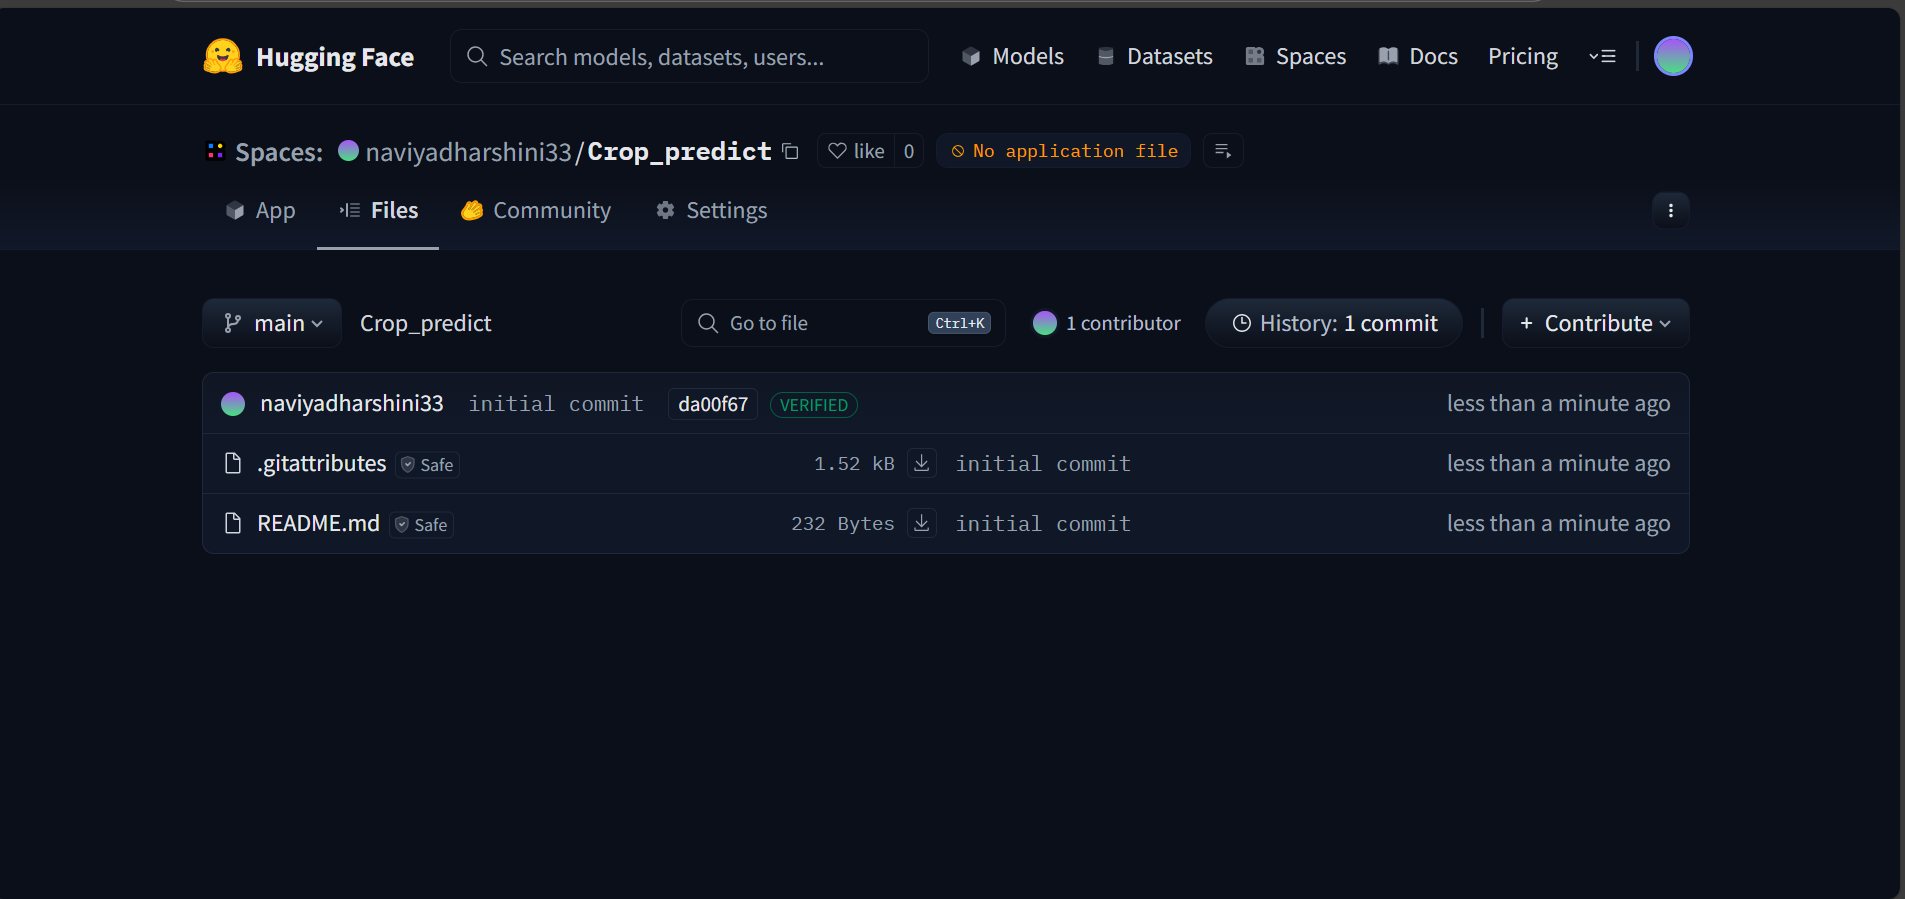

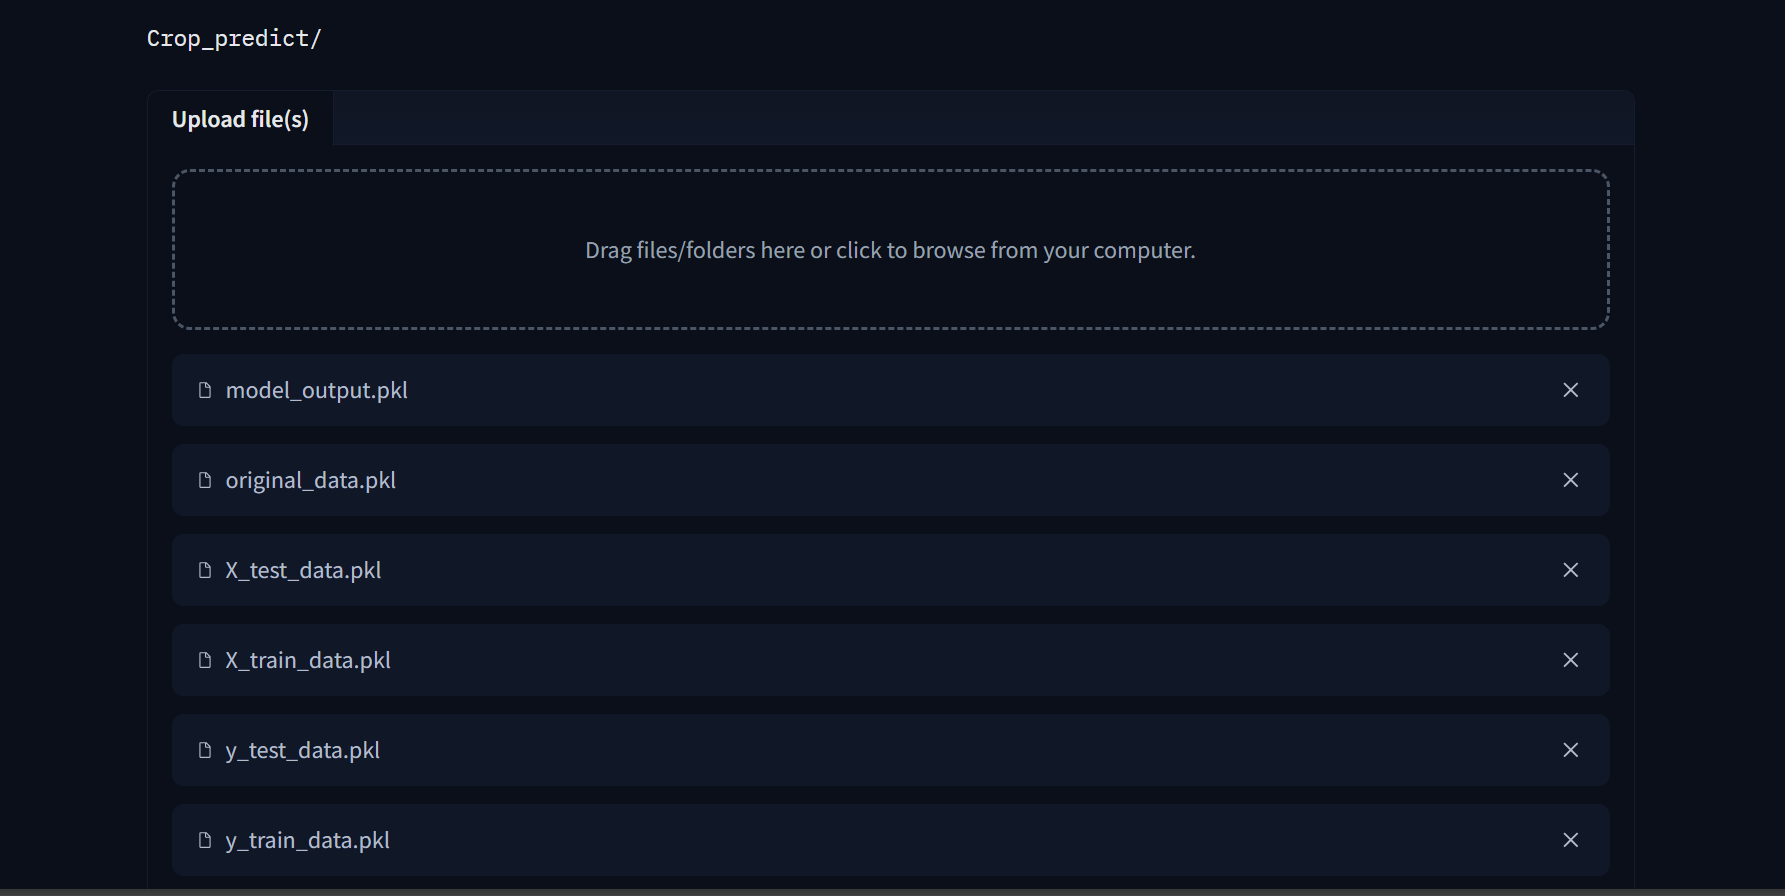